# Lending Club Project

## Methodologies applied in the project:

### 1- Data Extraction                                                                                                                                                                      

### 2- Exploratory Data Analysis                                                                                                                                                       

###  3- Data Cleaning                                                                                                                                                                         

###  4- Data Pre-processing                                                                                                                                                             

###  5- Machine Learning model using Linear Regression                                                                                                            

### 6- Deep Learning model using ANN                                                                                                                                          

### 7- Evaluation of Models

## Project Goal:

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict whether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. The "loan_status" column contains our label.

## Important Note: There are two different models done using different ways of data cleaning and preprocessing to reach the best possible accuracy.

# 1- Importing libraries and extracting data

In [800]:
import pandas as pd

In [801]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [802]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [475]:
feat_info('')

In [803]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [804]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

# 2- Displaying Data

In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [806]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [807]:
df[['term','grade','sub_grade','emp_title','emp_length','home_ownership',
    'verification_status','issue_d','loan_status','purpose','title']].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance


In [808]:
df[['earliest_cr_line','initial_list_status','application_type','address']].head()

,earliest_cr_line,initial_list_status,application_type,address
0,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


# 3- Removing Outliers

In [809]:
#drop first 2 values
df['dti'].sort_values(ascending=False).head(4)

285674    9999.00
350865    1622.00
338571     380.53
7011       189.90
Name: dti, dtype: float64

In [810]:
df.drop([285674,350865],inplace=True)
df['dti'].sort_values(ascending=False).head(5)

338571    380.53
7011      189.90
36015     145.65
296164    138.03
294182    120.66
Name: dti, dtype: float64

In [811]:
#remove first value
df['revol_util'].sort_values(ascending=False).head(5)

137211    892.3
329037    153.0
82600     152.5
65687     150.7
350333    148.0
Name: revol_util, dtype: float64

In [812]:
df.drop(137211,inplace=True)
df['revol_util'].sort_values(ascending=False).head(5)

329037    153.0
82600     152.5
65687     150.7
350333    148.0
165111    146.1
Name: revol_util, dtype: float64

# 4- Exploratory Data Analysis

## a- Heatmap

C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\258675989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')


<Axes: >

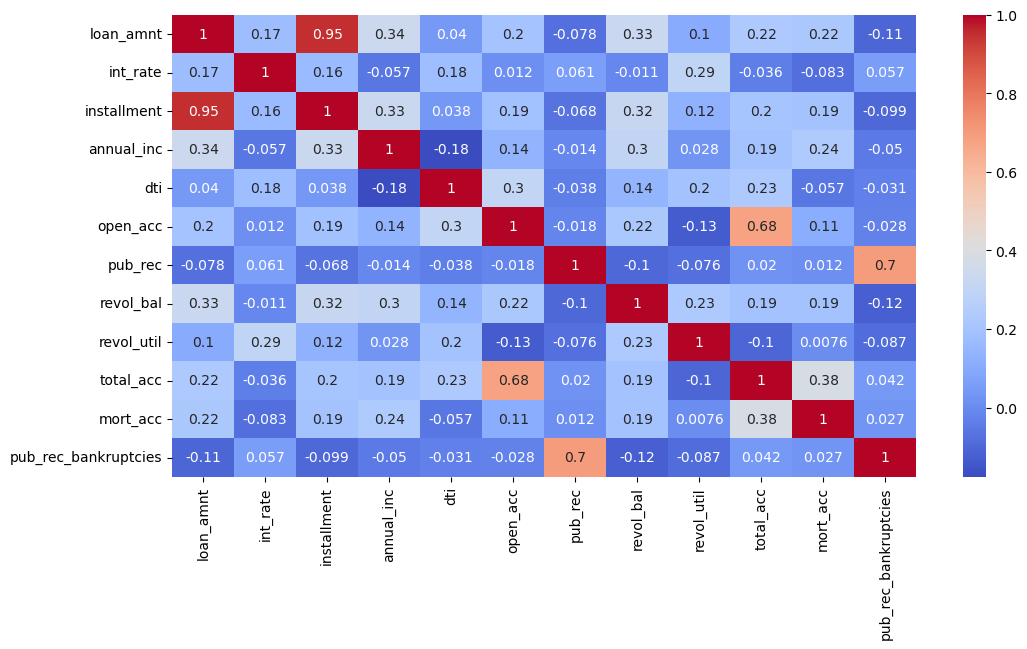

In [813]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')

There is a strong correlation between:                                                                                                      
1- loan_amnt and installment 0.9                                                                                                 
2- pub_rec and pub_rec_bankruptcies 0.7                                                                                         
3- open_acc and total_acc 0.68


## b- Finding factors affecting on loan_status

<Axes: xlabel='loan_status', ylabel='count'>

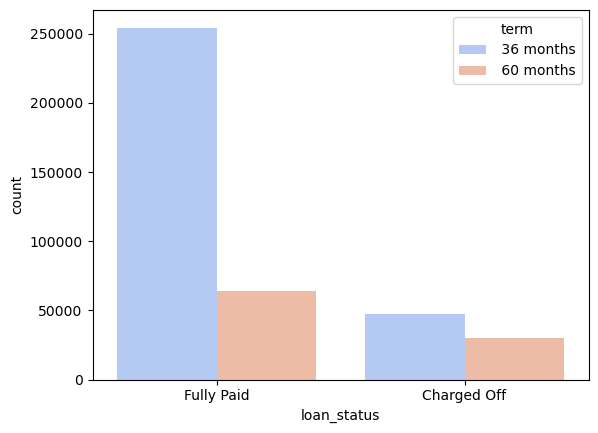

In [814]:
sns.countplot(data=df,x='loan_status',palette='coolwarm',hue='term')

Note: There is a large bias towards the number of fully paid loans.

<Axes: xlabel='loan_status', ylabel='count'>

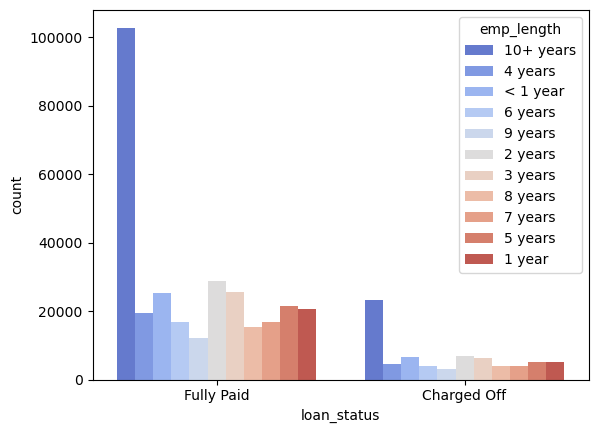

In [815]:
sns.countplot(data=df,x='loan_status',palette='coolwarm',hue='emp_length')

<Axes: xlabel='loan_status', ylabel='count'>

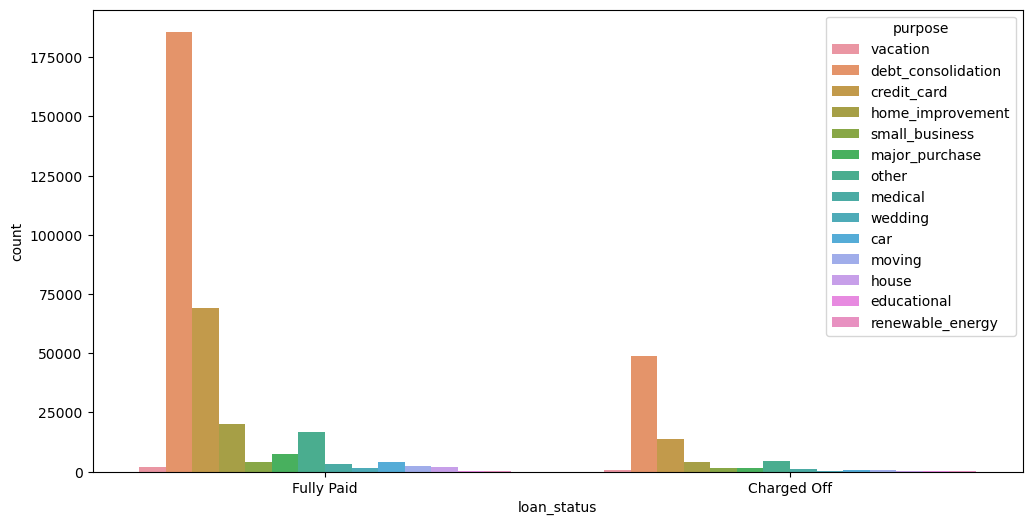

In [816]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='loan_status',hue='purpose')

<Axes: xlabel='loan_status', ylabel='count'>

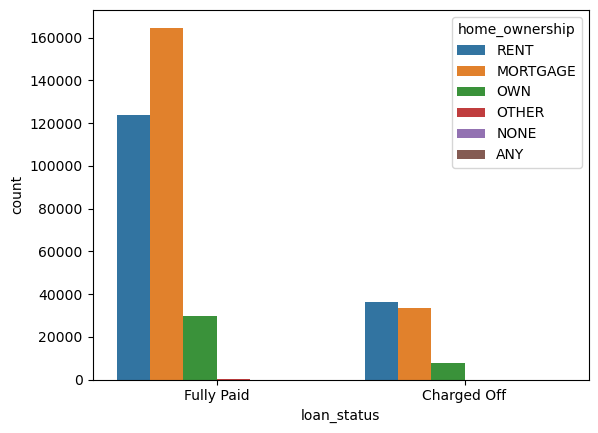

In [817]:
sns.countplot(data=df,x='loan_status',hue='home_ownership')

#### People who their home ownership are rented are more likely to charge off loans

<Axes: xlabel='loan_status', ylabel='count'>

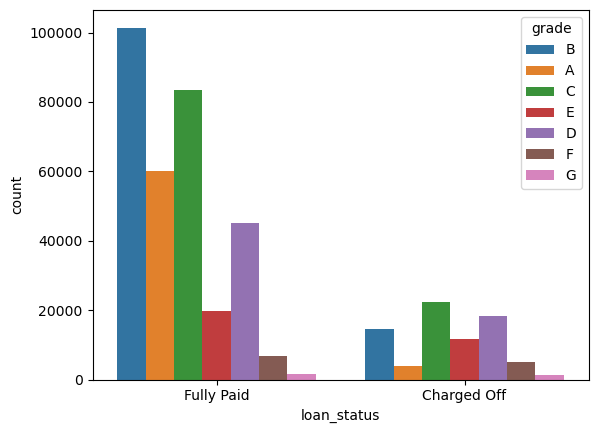

In [818]:
sns.countplot(data=df,x='loan_status',hue='grade')

#### People with grades of A and B, are more likely to fully pay their loans 

In [819]:
df.groupby('loan_status')
df[df['loan_status']=='Fully Paid'].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,318355.000000,318355.000000,318355.000000,3.183550e+05,318355.000000,318355.000000,318355.000000,3.183550e+05,318142.000000,318355.000000,286110.000000,317907.000000
mean,13866.879506,13.092120,426.761776,7.583028e+04,16.818975,11.240081,0.172967,1.595534e+04,52.794261,25.519866,1.892842,0.119997
std,8302.306023,4.319113,250.861093,6.231602e+04,8.010841,5.097630,0.497639,2.113224e+04,24.533272,11.878116,2.182461,0.352993
min,500.000000,5.320000,16.080000,2.500000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,7500.000000,9.910000,244.460000,4.605425e+04,10.870000,8.000000,0.000000,5.992000e+03,34.600000,17.000000,0.000000,0.000000
50%,12000.000000,12.990000,369.510000,6.500000e+04,16.340000,10.000000,0.000000,1.115800e+04,53.700000,24.000000,1.000000,0.000000
75%,19225.000000,15.610000,562.890000,9.000000e+04,22.290000,14.000000,0.000000,1.965700e+04,72.000000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,7.600000e+06,380.530000,90.000000,24.000000,1.743266e+06,153.000000,150.000000,34.000000,8.000000


In [820]:
df.groupby('loan_status')
df[df['loan_status']=='Charged Off'].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,77672.000000,77672.000000,77672.000000,7.767200e+04,77672.000000,77672.000000,77672.000000,7.767200e+04,77609.000000,77672.000000,72122.000000,77585.000000
mean,15126.448077,15.882630,452.707342,6.753641e+04,19.527866,11.602559,0.199609,1.539052e+04,57.869836,24.984216,1.501220,0.128414
std,8505.046486,4.388148,249.095420,5.830333e+04,8.407110,5.288525,0.648287,1.820350e+04,23.492327,11.913755,1.974366,0.368855
min,1000.000000,5.320000,21.620000,4.000000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8525.000000,12.990000,274.867500,4.200000e+04,13.330000,8.000000,0.000000,6.150000e+03,41.200000,16.000000,0.000000,0.000000
50%,14000.000000,15.610000,399.070000,5.900000e+04,19.340000,11.000000,0.000000,1.127750e+04,59.300000,23.000000,1.000000,0.000000
75%,20000.000000,18.640000,585.670000,8.000000e+04,25.550000,14.000000,0.000000,1.948500e+04,76.200000,32.000000,2.000000,0.000000
max,40000.000000,30.990000,1527.000000,8.706582e+06,93.860000,76.000000,86.000000,1.030826e+06,148.000000,151.000000,23.000000,8.000000


There is no a large difference in mean values between the fully paid and charged of loans in the all above available data other than small decrease in the dti at the fully paid loans.

<Axes: xlabel='loan_status', ylabel='dti'>

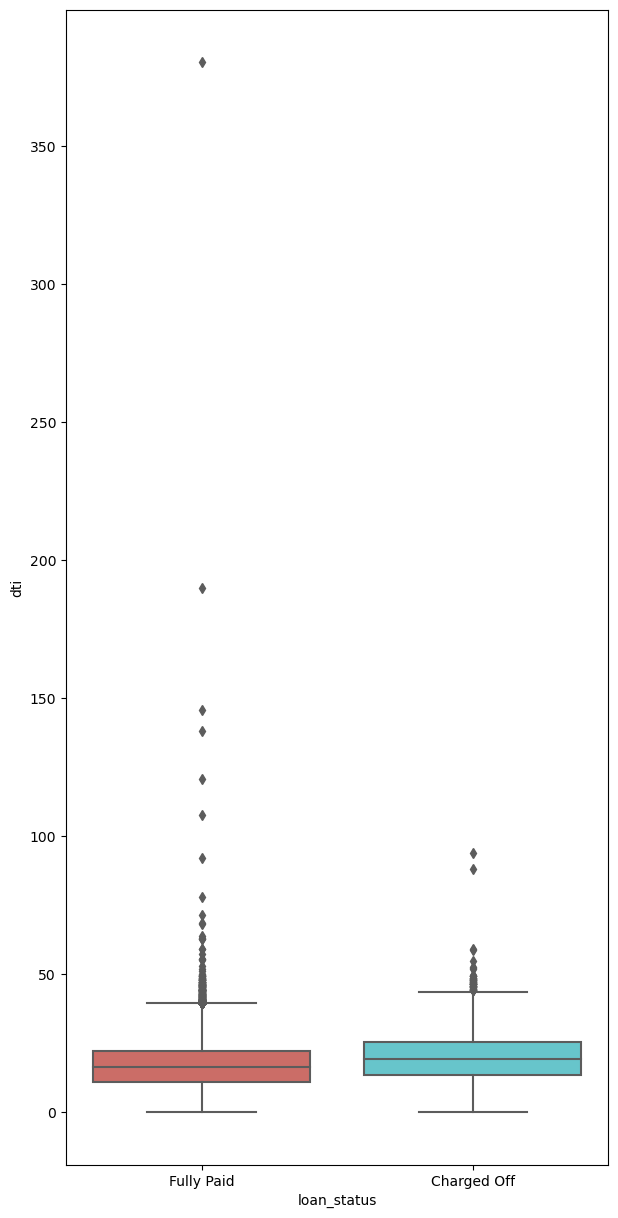

In [821]:
plt.figure(figsize=(7,15))
sns.boxplot(data=df,x='loan_status',y='dti',palette='hls')

<Axes: xlabel='loan_amnt', ylabel='installment'>

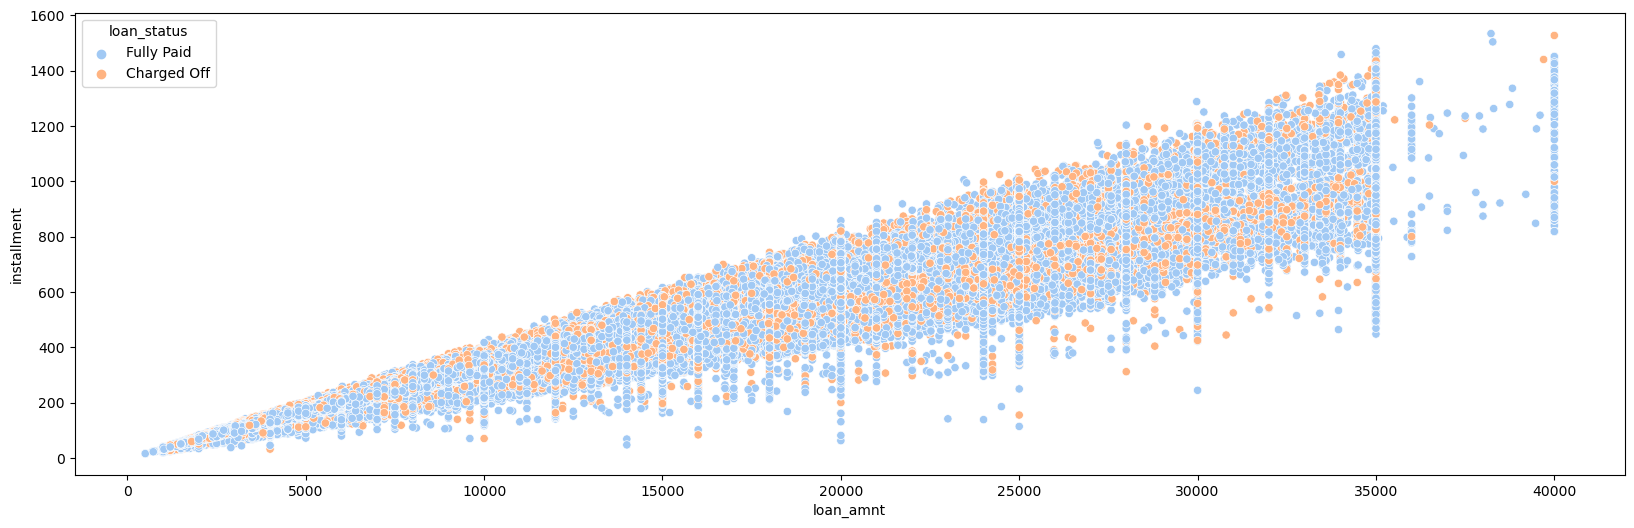

In [822]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df,x='loan_amnt',y='installment',hue='loan_status',palette='pastel')

## c- Showing correlation of data with the loan_status 

Changing loan_status value into dummy data as 1 for fully paid and 0 for Charged off

In [823]:
df['loan_status'].value_counts()

Fully Paid     318355
Charged Off     77672
Name: loan_status, dtype: int64

In [824]:
def loan_s(ls):
    
    if 'Fully Paid' in ls:
        return 1
    elif 'Charged Off' in ls:
        return 0
    else:
        return 'null'

In [825]:
df['loan_status']=df['loan_status'].apply(loan_s)

In [826]:
df[['loan_status']].head()

,loan_status
0,1
1,1
2,1
3,1
4,0


C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\3273672794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_status'].sort_values()[:-1].plot(kind='bar')


<Axes: >

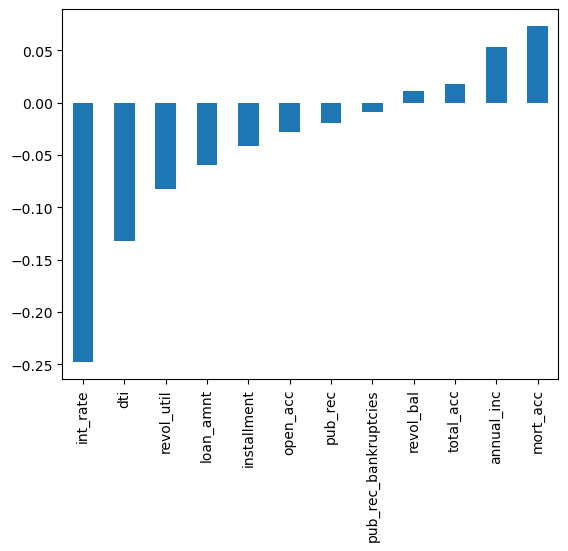

In [827]:
df.corr()['loan_status'].sort_values()[:-1].plot(kind='bar')

## d- Summary of displayed results due to the loan status

1- The term,emp_length and purpose doesn't affect on the loan status.                                                           
2- High classes are more likely full pay their loans, people who rent their homes are more likely to charge off their loan.     
3- There is a strong bias of data towards to the fully paid loans.                                                              4- The int_rate has highest negative correlation with loan status by -0.25, which is still considered not strong negative correlation.


# WAY 1:

# 1- Feature Engineering

## a- Changing format of data

In [828]:
df['term'].value_counts()

 36 months    302002
 60 months     94025
Name: term, dtype: int64

Changing term text values to be numerical

In [829]:
def term(trm):
    
    if '36' in trm:
        return 36
    elif '60' in trm:
        return 60
    else:
        return 'null'

In [830]:
df['term']=df['term'].apply(term)

In [831]:
df[['term']].head()

,term
0,36
1,36
2,36
3,36
4,60


In [832]:
df['emp_length'].value_counts()

10+ years    126040
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

Changing emp_length into integer giving more than 10 the 11 value and less than 1 the 0 value

In [833]:
def emp_l(el):
    el=str(el)
    n=2
    while n < 11:
        x=str(n)
        if '10+ years' in el:
            return 11
        elif '< 1 year' in el:
            return 0
        elif '1 year' in el:
            return 1
        elif x in el:
            return n
        n=n+1


In [834]:
df['emp_length']=df['emp_length'].apply(emp_l)

In [835]:
df['emp_length'].value_counts()

11.0    126040
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: emp_length, dtype: int64

In [836]:
df['pub_rec'].sort_values(ascending=False).head(9000)

218818    86.0
127417    40.0
252783    24.0
58202     19.0
112187    19.0
          ... 
253979     1.0
253981     1.0
339396     1.0
66400      1.0
166401     1.0
Name: pub_rec, Length: 9000, dtype: float64

Changing pub_rec value into dummy data as 1 for has pub_rec and 0 for doesnt have pub_rec

In [837]:
def pubrec(pr):
    if pr != 0:  
        return 1
    else:
        return 0

In [838]:
df['pub_rec']=df['pub_rec'].apply(pubrec)

In [839]:
df['pub_rec'].value_counts()

0    338269
1     57758
Name: pub_rec, dtype: int64

In [840]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [841]:
df['issue_year'] = df['issue_d'].apply(lambda date:date.year)
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda date:date.year)

In [842]:
df['issue_month'] = df['issue_d'].apply(lambda date:date.month)
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda date:date.month)

## b- Filling Missing Data

Dealing with emp_length:

<Axes: xlabel='application_type', ylabel='emp_length'>

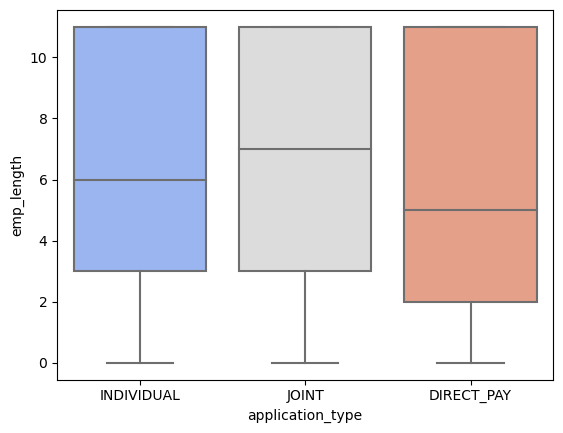

In [843]:
sns.boxplot(df,x='application_type',y='emp_length',palette='coolwarm')

In [844]:
def pub_rec_br(cols):
    el=cols[1]
    at=cols[0]
    if pd.isnull(el): 
        if 'INDIVIDUAL' in at :
            return 6
        elif 'JOINT' in at:
            return 7
        elif 'DIRECT_PAY' in at:
            return 5
    else:
        return el

In [845]:
df['emp_length']=df[['application_type','emp_length']].apply(pub_rec_br,axis=1)

Dealing with revol_util

In [846]:
df['revol_util'].fillna(df['revol_util'].mean(),inplace=True)


Dealing with pub_rec_bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

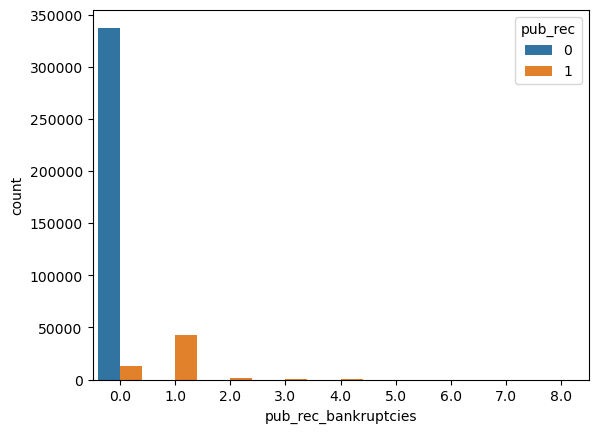

In [847]:
sns.countplot(df,hue='pub_rec',x='pub_rec_bankruptcies')

In [848]:
df[df['pub_rec']== 1][df['pub_rec_bankruptcies']==0]

C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\2607498135.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['pub_rec']== 1][df['pub_rec_bankruptcies']==0]


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,earliest_cr_line_year,issue_month,earliest_cr_line_month
124,28000.0,60,13.67,646.74,C,C4,Vice President,1.0,MORTGAGE,104000.0,...,19.0,w,INDIVIDUAL,2.0,0.0,"8367 Santos Lodge\nRobinsonmouth, VA 70466",2015,1993,12,2
125,12525.0,36,24.99,497.93,F,F4,Driver,2.0,RENT,70000.0,...,5.0,f,INDIVIDUAL,0.0,0.0,"065 Martinez Flats\nPort Samuel, AL 29597",2015,2007,7,4
131,30000.0,60,17.86,759.52,D,D5,IT Specialist,11.0,MORTGAGE,74000.0,...,18.0,w,INDIVIDUAL,1.0,0.0,"459 Mia Inlet\nNorth Davidhaven, TN 86630",2015,1988,4,12
134,35000.0,60,19.99,927.10,E,E1,Transportation manager,11.0,MORTGAGE,88500.0,...,22.0,f,INDIVIDUAL,2.0,0.0,"619 Daniels Junction Suite 249\nLake Frank, ME...",2014,1991,3,3
163,2200.0,36,16.29,77.67,D,D2,Quality Control Specialist,11.0,MORTGAGE,65500.0,...,9.0,f,INDIVIDUAL,2.0,0.0,"91467 Schmidt Lodge\nTracytown, KY 30723",2014,1992,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395808,5775.0,36,15.61,201.93,D,D1,MORTGAGE/PRIVATE BANK ASST.,4.0,OWN,43700.0,...,8.0,w,INDIVIDUAL,0.0,0.0,"58668 Glover Extension Apt. 743\nSouth Edward,...",2015,2002,8,12
395841,5800.0,36,6.03,176.53,A,A1,CNC Machinist,3.0,MORTGAGE,75000.0,...,21.0,f,INDIVIDUAL,1.0,0.0,72907 Elliott Parks Apt. 562\nWest Rebeccatown...,2014,2002,10,9
395854,9600.0,36,14.46,330.26,C,C4,Lab tech,9.0,OWN,30000.0,...,12.0,w,INDIVIDUAL,2.0,0.0,"36278 Braun Flats Apt. 739\nTammyland, MN 05113",2016,2004,3,1
395910,8325.0,36,17.57,299.18,D,D2,Laborer,2.0,RENT,38000.0,...,19.0,f,INDIVIDUAL,0.0,0.0,"413 Whitaker Road Suite 424\nPort Nicoleburgh,...",2014,2003,1,10


In [849]:
def pub_rec_br(cols):
    prb=cols[0]
    pr=cols[1]
    if pd.isnull(prb): 
        if pr == 0:
            return 0
        else:
            return 1
    else:
        return prb

In [850]:
df['pub_rec_bankruptcies']=df[['pub_rec','pub_rec_bankruptcies']].apply(pub_rec_br,axis=1)

## c- Encoding data

Changing grade value to be coded in numbers:

In [851]:
df['grade'].value_counts()

B    116016
C    105986
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [852]:
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4,'E':3,'F':2,'G':1}
df['grade_encoded'] = df['grade'].map(grade_mapping)

In [853]:
df[['grade','grade_encoded']].head()

,grade,grade_encoded
0,B,6
1,B,6
2,B,6
3,A,7
4,C,5


Change home_ownership to be coded in numbers

In [854]:
df['home_ownership'].value_counts()

MORTGAGE    198346
RENT        159789
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [855]:
home_mapping = {'OWN': 3, 'MORTGAGE': 2, 'RENT': 1, 'NONE': 0,'ANY':0,'OTHER':0}
df['home_ownership_encoded'] = df['home_ownership'].map(home_mapping)

In [856]:
df['home_ownership_encoded'].value_counts()

2    198346
1    159789
3     37746
0       146
Name: home_ownership_encoded, dtype: int64

In [857]:
df['initial_list_status'].value_counts()

f    238063
w    157964
Name: initial_list_status, dtype: int64

Changing initial_list_status into dummy data as 1 for w and 0 for f

In [858]:
def init_list_st(ils):
    
    if 'w' in ils:
        return 1
    elif 'f' in ils:
        return 0
    else:
        return 'null'

In [859]:
df['initial_list_status']=df['initial_list_status'].apply(init_list_st)

In [860]:
df['initial_list_status'].value_counts()

0    238063
1    157964
Name: initial_list_status, dtype: int64

In [861]:
df['verification_status'].value_counts()

Verified           139562
Source Verified    131384
Not Verified       125081
Name: verification_status, dtype: int64

Changing verification_status into dummies

In [862]:
verified_mapping = {'Verified': 1, 'Source Verified': 1, 'Not Verified': 0}
df['verification_status'] = df['verification_status'].map(verified_mapping)

In [863]:
df['verification_status'].value_counts()

1    270946
0    125081
Name: verification_status, dtype: int64

Changing application_type into dummies

In [864]:
applicationtype= pd.get_dummies(df['application_type'],drop_first=True)
df.drop(['application_type'],axis=1,inplace=True)
df = pd.concat([df,applicationtype],axis=1)

# 2- Removing unused columns in the model

In [865]:
df.drop(['grade','sub_grade','emp_title','issue_d','purpose','title','earliest_cr_line','earliest_cr_line_month','issue_month','home_ownership','address'],axis=1,inplace=True)

# 3- Apply ML Model using Linear regression 

## To deal with mort_acc missing values

<Axes: xlabel='mort_acc', ylabel='total_acc'>

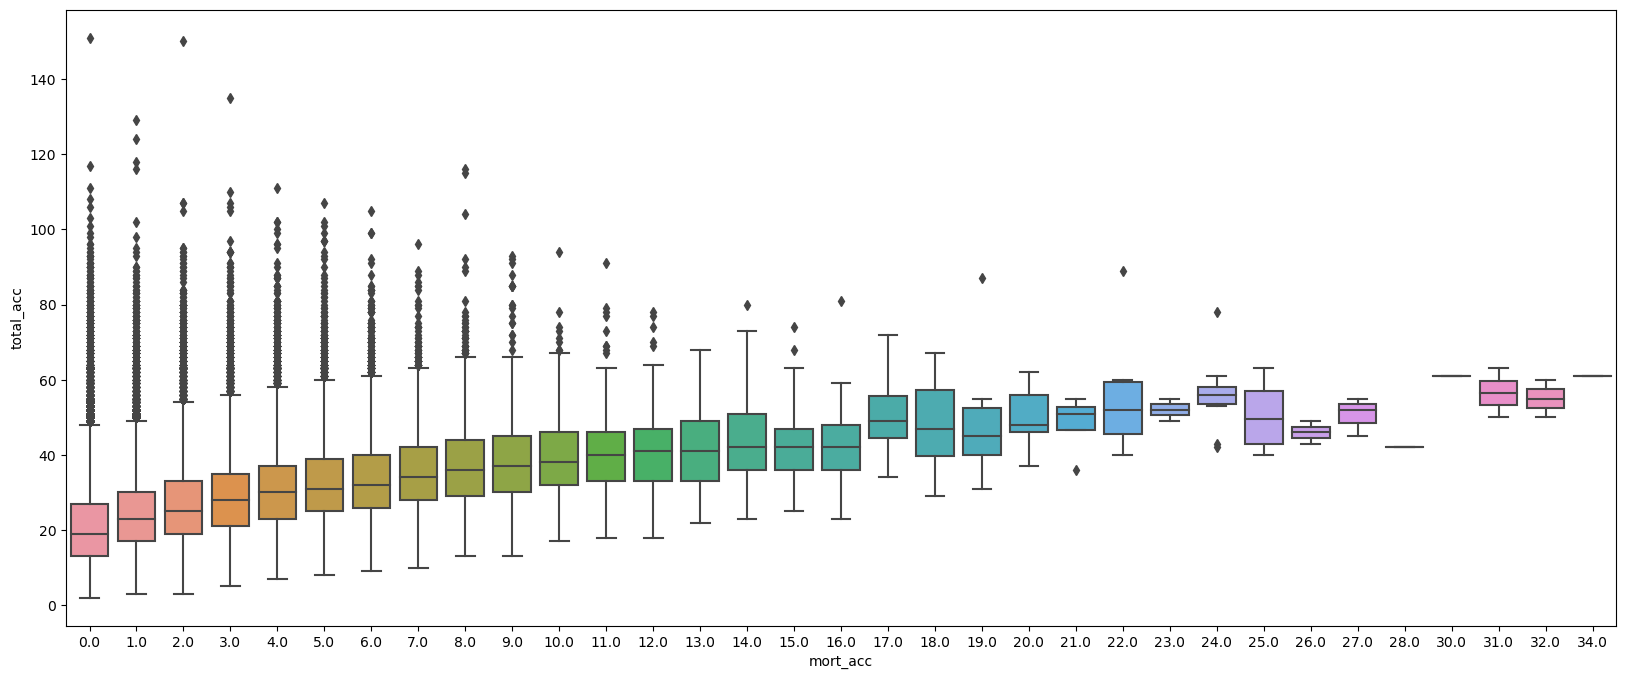

In [866]:
plt.figure(figsize=(20,8))
sns.boxplot(df,x='mort_acc',y='total_acc')

In [867]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [868]:
null_mort_acc= df[pd.isnull(df['mort_acc'])]

In [869]:
null_mort_acc.drop('mort_acc',axis=1,inplace=True)

C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\4165332961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_mort_acc.drop('mort_acc',axis=1,inplace=True)


In [870]:
df.dropna(inplace=True)

In [871]:
x=df.drop('mort_acc',axis=1)
y= df['mort_acc']
#x.columns = x.columns.astype(str)
#y = y.astype(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [872]:
l_model=LinearRegression()

In [873]:
l_model.fit(x_train,y_train)


LinearRegression()

In [874]:
pred_mortg=l_model.predict(x_test)

In [875]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [876]:
print('mean squared error:',mean_squared_error(y_test,pred_mortg))
print('mean absolute error:',mean_absolute_error(y_test,pred_mortg))

mean squared error: 3.1764386090055536
mean absolute error: 1.2943121079258446


In [877]:
pred_mortg=l_model.predict(null_mort_acc)

In [878]:
null_mort_acc['mort_acc']=pred_mortg

C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\146351513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_mort_acc['mort_acc']=pred_mortg


In [879]:
null_mort_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37795 entries, 22 to 396029
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               37795 non-null  float64
 1   term                    37795 non-null  int64  
 2   int_rate                37795 non-null  float64
 3   installment             37795 non-null  float64
 4   emp_length              37795 non-null  float64
 5   annual_inc              37795 non-null  float64
 6   verification_status     37795 non-null  int64  
 7   loan_status             37795 non-null  int64  
 8   dti                     37795 non-null  float64
 9   open_acc                37795 non-null  float64
 10  pub_rec                 37795 non-null  int64  
 11  revol_bal               37795 non-null  float64
 12  revol_util              37795 non-null  float64
 13  total_acc               37795 non-null  float64
 14  initial_list_status     37795 non-nu

Making datafarmes with same sequence of columns

In [880]:
mort_acc=df['mort_acc']

In [881]:
df.drop('mort_acc',axis=1,inplace=True)

In [882]:
df['mort_acc']=mort_acc

In [883]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358232 entries, 0 to 396028
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               358232 non-null  float64
 1   term                    358232 non-null  int64  
 2   int_rate                358232 non-null  float64
 3   installment             358232 non-null  float64
 4   emp_length              358232 non-null  float64
 5   annual_inc              358232 non-null  float64
 6   verification_status     358232 non-null  int64  
 7   loan_status             358232 non-null  int64  
 8   dti                     358232 non-null  float64
 9   open_acc                358232 non-null  float64
 10  pub_rec                 358232 non-null  int64  
 11  revol_bal               358232 non-null  float64
 12  revol_util              358232 non-null  float64
 13  total_acc               358232 non-null  float64
 14  initial_list_status 

In [884]:
df = pd.concat([df,null_mort_acc],axis=0)

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396027 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396027 non-null  float64
 1   term                    396027 non-null  int64  
 2   int_rate                396027 non-null  float64
 3   installment             396027 non-null  float64
 4   emp_length              396027 non-null  float64
 5   annual_inc              396027 non-null  float64
 6   verification_status     396027 non-null  int64  
 7   loan_status             396027 non-null  int64  
 8   dti                     396027 non-null  float64
 9   open_acc                396027 non-null  float64
 10  pub_rec                 396027 non-null  int64  
 11  revol_bal               396027 non-null  float64
 12  revol_util              396027 non-null  float64
 13  total_acc               396027 non-null  float64
 14  initial_list_status 

# 4- Applying deep learning model using ANN to find the final objective of the project  " Detecting whether person will pay his debt or not "

## a- Splitting data:

In [886]:
x= df.drop(['loan_status'],axis=1)
y= df['loan_status']

In [887]:
x=x.values
y=y.values

In [888]:
from sklearn.model_selection import train_test_split

In [889]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

## b- Scaling data:

In [890]:
from sklearn.preprocessing import MinMaxScaler

In [891]:
scaling = MinMaxScaler()
scaling.fit(x_train)

MinMaxScaler()

In [892]:
x_TrainScaled= scaling.transform(x_train)
x_TestScaled=scaling.transform(x_test)

## c- Creating and Training Deep a Learning model:

In [893]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Activation
from tensorflow.keras.optimizers import Adam

In [894]:
model = Sequential()
model.add(Dense(22,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(5,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [895]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [896]:
from tensorflow.keras.callbacks import EarlyStopping

In [897]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [898]:
model.fit(x_TrainScaled,y_train,batch_size=256,
    epochs=200,validation_data=(x_TestScaled, y_test),callbacks=[early_stop])



Epoch 1/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4950 - val_loss: 0.4549
Epoch 2/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4638 - val_loss: 0.4537
Epoch 3/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4603 - val_loss: 0.4527
Epoch 4/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4582 - val_loss: 0.4519
Epoch 5/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4558 - val_loss: 0.4510
Epoch 6/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4545 - val_loss: 0.4506
Epoch 7/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4537 - val_loss: 0.4507
Epoch 8/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.4560 - val_loss: 0.4503
Epoch 9/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.4560 - val_loss: 0.4503
Epoch 10/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4512 - val_loss: 0.4500
Epoch 11/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4530 - val_loss: 0.4495
Epoch 12/200
1238/

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4484 - val_loss: 0.4464
Epoch 68/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4495 - val_loss: 0.4477
Epoch 69/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4500 - val_loss: 0.4462
Epoch 70/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4498 - val_loss: 0.4466
Epoch 71/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4482 - val_loss: 0.4468
Epoch 72/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4505 - val_loss: 0.4463
Epoch 73/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4484 - val_loss: 0.4467
Epoch 74/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4491 - val_loss: 0.4458
Epoch 75/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4497 - val_loss: 0.4468
Epoch 76/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4509 - val_loss: 0.4464
Epoch 77/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4473 - val_loss: 0.4461
Epoch 78/200
1238/1238 

## 5- Model Evaluation and Prediction

In [901]:
hist1=pd.DataFrame(model.history.history)

<Axes: >

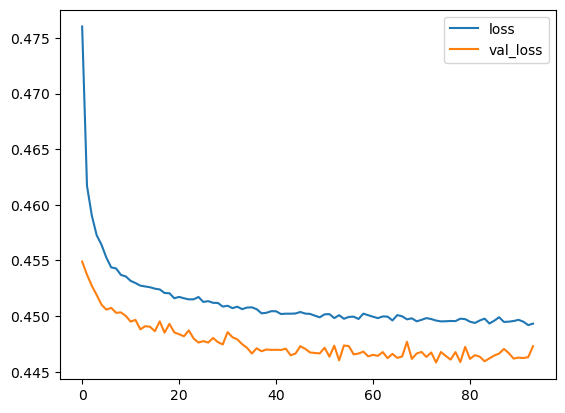

In [902]:
hist1.plot()

In [903]:
predictions1 = (model.predict(x_TestScaled)>0.5).astype("int32")

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [905]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [906]:
print('Classification Report:\n',classification_report(y_test,predictions1))

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.03      0.06     15484
           1       0.81      0.99      0.89     63722

    accuracy                           0.81     79206
   macro avg       0.68      0.51      0.48     79206
weighted avg       0.76      0.81      0.73     79206



In [908]:
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions1))

Confusion Matrix:
 [[  489 14995]
 [  383 63339]]


# Way 2:

In [909]:
df2 = pd.read_csv('../DATA/lending_club_loan_two.csv')

## 1- Feature Engineering

### a- Dealing with missing data 

Showing number of missing data at each column:

In [910]:
df2.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Missing data as percentage:

In [911]:
100* df2.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789252
emp_length              4.621150
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443152
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543541
pub_rec_bankruptcies    0.135092
address                 0.000000
dtype: float64

Dealing with emp_title:

In [912]:
df2['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Column will be deleted due large number of jobs

In [913]:
df2 = df2.drop('emp_title',axis=1)

Dealing with emp_length:

In [914]:
emp_co = df2[df2['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [915]:
emp_fp = df2[df2['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [916]:
emp_len = emp_co/emp_fp

In [917]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

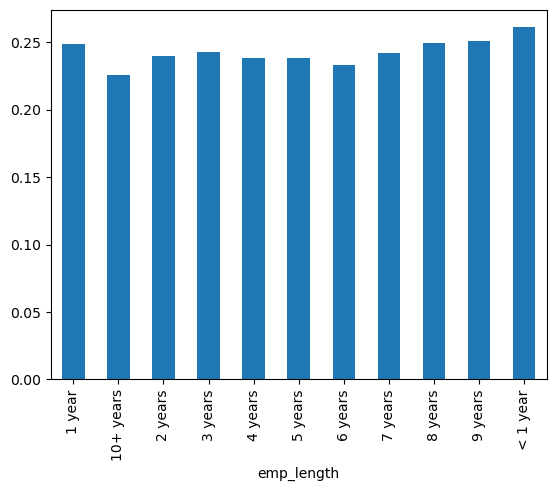

In [918]:
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths, so it will be dropped too

In [919]:
df2 = df2.drop('emp_length',axis=1)

Dealing with purpose and title:

In [920]:
df2['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [921]:
df2['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column, so it is a useless column and will be deleted

In [922]:
df2 = df2.drop('title',axis=1)

Dealing with mort_acc:

In [923]:
print("Correlation with the mort_acc column")
df2.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\225970879.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [924]:
print("Mean of mort_acc column per total_acc")
df2.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\912121105.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [925]:
total_acc_avg = df2.groupby('total_acc').mean()['mort_acc']

C:\Users\Mido\AppData\Local\Temp\ipykernel_1332\126183837.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df2.groupby('total_acc').mean()['mort_acc']


In [926]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [927]:
df2['mort_acc'] = df2.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [928]:
df2.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

The remaining missing data are so low so they will be deleted

In [929]:
df2 = df2.dropna()

In [930]:
df2.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### b- Encoding and changing format of data:

Showing all non-numeric data:

In [931]:
df2.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

term feature: changing format of data

In [932]:
df2['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [933]:
df2['term'] = df2['term'].apply(lambda term: int(term[:3]))

grade feature:
it will be deleted as it is a part of sub_grade

In [934]:
df2 = df2.drop('grade',axis=1)

sub_grade feature: turning it into dummy variable

In [935]:
subgrade_dummies = pd.get_dummies(df2['sub_grade'],drop_first=True)

In [936]:
df2 = pd.concat([df2.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

verification_status, application_type,initial_list_status and purpose features: Turning them into dummy variables

In [937]:
dummies = pd.get_dummies(df2[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df2 = df2.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df2 = pd.concat([df2,dummies],axis=1)

home_ownership feature: changing format of data and turning the column into dummy variable

In [938]:
df2['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [939]:
df2['home_ownership']=df2['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df2['home_ownership'],drop_first=True)
df2 = df2.drop('home_ownership',axis=1)
df2 = pd.concat([df2,dummies],axis=1)

address feature: getting the zip code from the address and turning it into dummy variables

In [940]:
df2['zip_code'] = df2['address'].apply(lambda address:address[-5:])

In [941]:
dummies = pd.get_dummies(df2['zip_code'],drop_first=True)
df2 = df2.drop(['zip_code','address'],axis=1)
df2 = pd.concat([df2,dummies],axis=1)

Dealing with issue_d: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, the feature will be dropped

In [942]:
df2 = df2.drop('issue_d',axis=1)

Dealing with earliest_cr_line: This appears to be a historical time stamp feature, the year only will be extracted 

In [943]:
df2['earliest_cr_year'] = df2['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df2 = df2.drop('earliest_cr_line',axis=1)

Finally encoding loan_status:

In [944]:
encoded_loan= {'Fully Paid':1, 'Charged Off':0}

In [945]:
df2['loan_status']=df2['loan_status'].map(encoded_loan)

In [946]:
df2['loan_status'].value_counts()

1    317696
0     77523
Name: loan_status, dtype: int64

Checking if there is non-numerical data left:

In [947]:
df2.select_dtypes(['object']).columns

Index([], dtype='object')

## 2- Applying deep learning model using ANN to find the final objective of the project " Detecting whether person will pay his debt or not "

## a- Splitting Data

In [948]:
from sklearn.model_selection import train_test_split

In [949]:
X = df2.drop('loan_status',axis=1).values
y = df2['loan_status'].values

In [950]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## b- Scaling data

In [951]:
from sklearn.preprocessing import MinMaxScaler

In [952]:
scaler = MinMaxScaler()

In [953]:
X_train = scaler.fit_transform(X_train)

In [954]:
X_test = scaler.transform(X_test)

## c- Creating and Training Deep a Learning model

In [955]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [956]:
model2 = Sequential()

In [957]:
# input layer
model2.add(Dense(78,  activation='relu'))
model2.add(Dropout(0.5))

# hidden layer
model2.add(Dense(39, activation='relu'))
model2.add(Dropout(0.5))

# hidden layer
model2.add(Dense(19, activation='relu'))
model2.add(Dropout(0.5))

# output layer
model2.add(Dense(units=1,activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [958]:
from tensorflow.keras.callbacks import EarlyStopping

In [959]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [960]:
model2.fit(x=X_train, y=y_train, epochs=200,batch_size=256,validation_data=(X_test, y_test),callbacks=[early_stop] )

Epoch 1/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.4146 - val_loss: 0.2675
Epoch 2/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2774 - val_loss: 0.2655
Epoch 3/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.2680 - val_loss: 0.2649
Epoch 4/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.2667 - val_loss: 0.2639
Epoch 5/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2653 - val_loss: 0.2643
Epoch 6/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2657 - val_loss: 0.2636
Epoch 7/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2648 - val_loss: 0.2642
Epoch 8/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.2645 - val_loss: 0.2645
Epoch 9/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2635 - val_loss: 0.2640
Epoch 10/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2638 - val_loss: 0.2645
Epoch 11/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2650 - val_loss: 0.2636
Epoch 

## 3- Model Prediction and Evaluation:

In [961]:
hist2=pd.DataFrame(model2.history.history)

<Axes: >

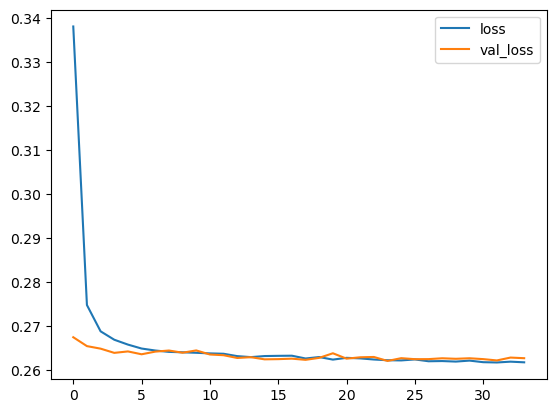

In [962]:
hist2.plot()

In [963]:
predictions2 = (model2.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [964]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [965]:
print('Classification Report:\n',classification_report(y_test,predictions2))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [966]:
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions2))

Confusion Matrix:
 [[ 6722  8936]
 [    1 63385]]


## Conclusion:

Due different ways of data preprocessing, there are different accuracy results between the two models. The second model has a higher accuracy "89%" than the first model "81%" due to a bigger number of features using many dummy variables and deleting columns which may cause noise or do not affect the loan status,but both models faced difficulties on getting a high recall percentage in the 0 or the predicted charged off data. This resulted due to the high bias for the fully paid data. Enhancement can be done to have more data on the charged off loans and to be more informative to have better accuracy across the whole dataset.

## 4- Saving the model

In [756]:
from tensorflow.keras.models import load_model

In [757]:
model2.save('final_model.h5')